<a href="https://colab.research.google.com/github/Benji-Young/Piecewise-Regression/blob/main/Piecewise_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

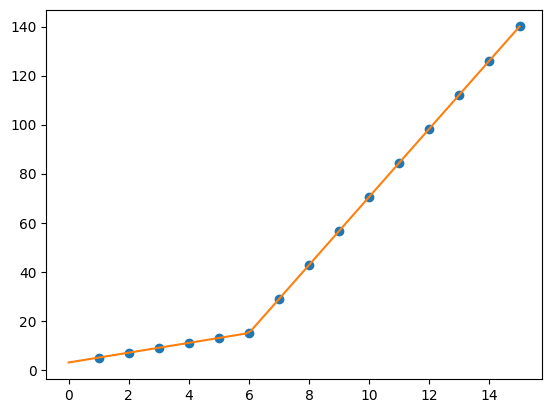

In [5]:
from scipy import optimize
import matplotlib.pyplot as plt
import numpy as np

x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10 ,11, 12, 13, 14, 15], dtype=float)
y = np.array([5, 7, 9, 11, 13, 15, 28.92, 42.81, 56.7, 70.59, 84.47, 98.36, 112.25, 126.14, 140.03])


def piecewise_linear(x, x0, y0, k1, k2):
    '''
      x: The independent variable value for which the function is evaluated.
      x0: This represents the breakpoint, the x-value where the linear segments change.
      y0: The y-value at the breakpoint x0.
      k1: Slope of the first linear segment (before the breakpoint).
      k2: Slope of the second linear segment (after the breakpoint).
    '''
    return np.piecewise(x, [x < x0, x >= x0], [lambda x:k1*x + y0-k1*x0, lambda x:k2*x + y0-k2*x0])

p , e = optimize.curve_fit(piecewise_linear, x, y)
xd = np.linspace(0, 15, 100)
plt.plot(x, y, "o")
plt.plot(xd, piecewise_linear(xd, *p))

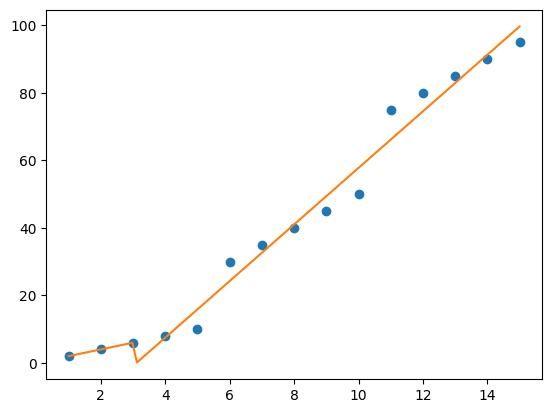

In [13]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Sample data with two breakpoints
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], dtype=float)
y = np.array([2, 4, 6, 8, 10, 30, 35, 40, 45, 50, 75, 80, 85, 90, 95])

def piecewise_linear(x, x0, y0, k1, x1, y1, k2, k3):  # Added k3 here
    condlist = [x < x0, (x >= x0) & (x < x1), x >= x1]
    funclist = [lambda x: k1*x + y0-k1*x0,
                lambda x: k2*x + y1-k2*x1,
                lambda x: k3*x + y1-k3*x1]  # Corrected y2 to y1
    return np.piecewise(x, condlist, funclist)

# Initial guesses for parameters, crucial for fitting!
p0 = [3, 6, 2, 10, 50, 5, 3]  # Added an initial guess for k3

popt, _ = curve_fit(piecewise_linear, x, y, p0=p0)
xd = np.linspace(1, 15, 100)
plt.plot(x, y, "o")
plt.plot(xd, piecewise_linear(xd, *popt))
plt.show()